# Machine Learning K-Means Sample_Superstore Project

In [383]:
#import necessary libraries
import pandas as pd

#notice that we import KMeans which will be used to create clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set

In [384]:
store = pd.read_csv('Sample_Superstore.csv',encoding='unicode-escape')


In [385]:
store

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,6/12/2018,6/16/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,10/11/2017,10/18/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,10/11/2017,10/18/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,1/21/2016,1/23/2016,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2/26/2019,3/3/2019,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2/26/2019,3/3/2019,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2/26/2019,3/3/2019,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# Understading The Data Set

In [386]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [387]:
store['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [388]:
store.describe().astype(int)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9983,9994,9994,9994,9994
mean,4997,55245,229,3,0,28
std,2885,32038,623,2,0,234
min,1,1040,0,1,0,-6599
25%,2499,23223,17,2,0,1
50%,4997,57103,54,3,0,8
75%,7495,90008,209,5,0,29
max,9994,99301,22638,14,0,8399


In [389]:
store.isna().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

# Cleaning and Manipulating Data

In [390]:
data=store[store['Postal Code'].notna()]

In [391]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [392]:
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [393]:
data['Order Date'] =pd.to_datetime(data['Order Date'])

C:\Users\YAKUBI~1\AppData\Local\Temp/ipykernel_128/1903401126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Order Date'] =pd.to_datetime(data['Order Date'])


In [394]:
data['Ship Date'] =pd.to_datetime(data['Ship Date'])

C:\Users\YAKUBI~1\AppData\Local\Temp/ipykernel_128/1360154561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ship Date'] =pd.to_datetime(data['Ship Date'])


In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9983 non-null   int64         
 1   Order ID        9983 non-null   object        
 2   Order Date      9983 non-null   datetime64[ns]
 3   Ship Date       9983 non-null   datetime64[ns]
 4   Ship Mode       9983 non-null   object        
 5   Customer ID     9983 non-null   object        
 6   Customer Name   9983 non-null   object        
 7   Segment         9983 non-null   object        
 8   Country/Region  9983 non-null   object        
 9   City            9983 non-null   object        
 10  State           9983 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9983 non-null   object        
 13  Product ID      9983 non-null   object        
 14  Category        9983 non-null   object        
 15  Sub-

In [396]:
value=data.groupby(['Category'])['Sales'].sum().astype(int)
value

Category
Furniture          736879
Office Supplies    716837
Technology         834554
Name: Sales, dtype: int32

In [397]:
total= data.Sales.sum().astype(int)
total

2288271

In [403]:
percent_diff=((value/total)*100).astype(int)
percent_diff

Category
Furniture          32
Office Supplies    31
Technology         36
Name: Sales, dtype: int32

In [404]:
valueR=data.groupby(['Region'])['Sales'].sum().astype(int)
valueR

Region
Central    501239
East       669851
South      391721
West       725457
Name: Sales, dtype: int32

In [405]:
region_percent=((valueR/total)*100).astype(int)
region_percent

Region
Central    21
East       29
South      17
West       31
Name: Sales, dtype: int32

# Calculating Recency

In [406]:
data['Order Date'].max()

Timestamp('2019-12-30 00:00:00')

In [407]:
data.groupby(['Customer ID'])['Order Date'].max()

Customer ID
AA-10315   2019-06-29
AA-10375   2019-12-11
AA-10480   2019-04-15
AA-10645   2019-11-05
AB-10015   2018-11-10
              ...    
XP-21865   2019-11-17
YC-21895   2019-12-26
YS-21880   2019-12-21
ZC-21910   2019-11-06
ZD-21925   2019-06-11
Name: Order Date, Length: 793, dtype: datetime64[ns]

In [408]:
data.groupby(['Customer ID'])['Order Date'].max().sort_values(ascending=False) 

Customer ID
JM-15580   2019-12-30
EB-13975   2019-12-30
PO-18865   2019-12-30
CC-12430   2019-12-30
JG-15160   2019-12-29
              ...    
VT-21700   2017-04-05
CM-12715   2017-03-01
RE-19405   2016-12-29
GR-14560   2016-11-21
NB-18580   2016-10-22
Name: Order Date, Length: 793, dtype: datetime64[ns]

In [409]:
data.groupby(['Customer ID'])['Order Date'].max().sort_values(ascending=False)[:10]

Customer ID
JM-15580   2019-12-30
EB-13975   2019-12-30
PO-18865   2019-12-30
CC-12430   2019-12-30
JG-15160   2019-12-29
KH-16360   2019-12-29
MC-17845   2019-12-29
KB-16600   2019-12-29
BP-11185   2019-12-29
BS-11755   2019-12-29
Name: Order Date, dtype: datetime64[ns]

In [410]:
recency = data.groupby(['Customer ID'])['Order Date'].max()
recency.head()

Customer ID
AA-10315   2019-06-29
AA-10375   2019-12-11
AA-10480   2019-04-15
AA-10645   2019-11-05
AB-10015   2018-11-10
Name: Order Date, dtype: datetime64[ns]

In [411]:
recency = recency-data['Order Date'].max()

In [412]:
recency.head(3)

Customer ID
AA-10315   -184 days
AA-10375    -19 days
AA-10480   -259 days
Name: Order Date, dtype: timedelta64[ns]

In [413]:
recency = recency.dt.days

In [414]:
recency = recency.rename('Recency')
recency.head()

Customer ID
AA-10315   -184
AA-10375    -19
AA-10480   -259
AA-10645    -55
AB-10015   -415
Name: Recency, dtype: int64

In [415]:
RFM = pd.DataFrame(recency)
RFM.head(3)

,Recency
Customer ID,
AA-10315,-184
AA-10375,-19
AA-10480,-259


In [416]:
RFM.reset_index(inplace=True)
RFM.head(2)

,Customer ID,Recency
0,AA-10315,-184
1,AA-10375,-19


In [417]:
RFM.describe()

,Recency
count,793.000000
mean,-147.292560
std,186.465917
min,-1164.000000
25%,-183.000000
50%,-76.000000
75%,-30.000000
max,0.000000


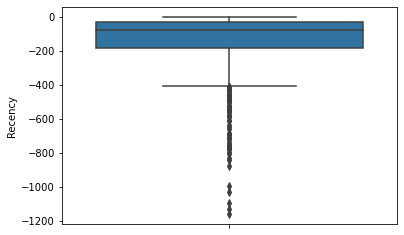

In [418]:
sns.boxplot(y='Recency',data=RFM)

plt.show()

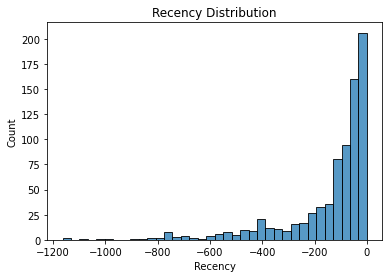

In [419]:
sns.histplot(data=RFM['Recency'])
plt.title('Recency Distribution')

plt.show()

# Calculating Frequency

In [420]:
frequency=(data.groupby('Customer ID')['Customer ID'].count())
frequency.head

<bound method NDFrame.head of Customer ID
AA-10315    11
AA-10375    15
AA-10480    12
AA-10645    18
AB-10015     6
            ..
XP-21865    28
YC-21895     8
YS-21880    12
ZC-21910    31
ZD-21925     9
Name: Customer ID, Length: 793, dtype: int64>

In [421]:
(data.groupby('Customer ID')['Order Date'].count()).sort_values(ascending=False)[:10]


Customer ID
WB-21850    37
PP-18955    34
JL-15835    34
MA-17560    34
SV-20365    32
JD-15895    32
CK-12205    32
EH-13765    32
EP-13915    31
ZC-21910    31
Name: Order Date, dtype: int64

In [422]:
frequency = frequency.rename('Frequency')
frequency.head(2)

Customer ID
AA-10315    11
AA-10375    15
Name: Frequency, dtype: int64

In [423]:
RFM = RFM.merge(frequency,on='Customer ID')

RFM.head(2)

,Customer ID,Recency,Frequency
0,AA-10315,-184,11
1,AA-10375,-19,15


In [424]:
RFM.describe()

,Recency,Frequency
count,793.000000,793.000000
mean,-147.292560,12.588903
std,186.465917,6.242165
min,-1164.000000,1.000000
25%,-183.000000,8.000000
50%,-76.000000,12.000000
75%,-30.000000,16.000000
max,0.000000,37.000000


(0.0, 50.0)

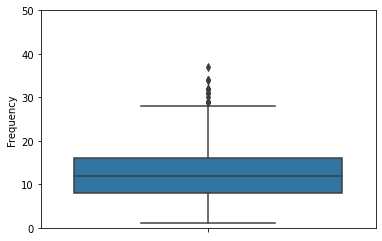

In [425]:
sns.boxplot(y='Frequency',data=RFM)
plt.ylim(0,50)

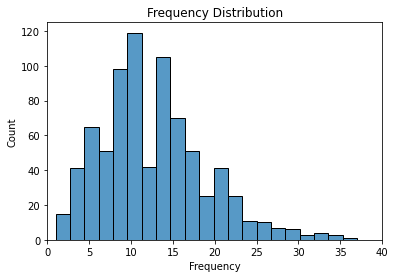

In [426]:
sns.histplot(data=RFM['Frequency'])
plt.title('Frequency Distribution')
plt.xlim(0,40)
plt.show()

# Calculating Monetary Value

In [427]:
monetary=(data.groupby('Customer ID').Sales.sum())
monetary

Customer ID
AA-10315    5563.560
AA-10375    1056.390
AA-10480    1790.512
AA-10645    5086.935
AB-10015     886.156
              ...   
XP-21865    2374.658
YC-21895    5454.350
YS-21880    6720.444
ZC-21910    8025.707
ZD-21925    1493.944
Name: Sales, Length: 793, dtype: float64

In [428]:
monetary = monetary.rename('Monetary')
monetary.head(2)

Customer ID
AA-10315    5563.56
AA-10375    1056.39
Name: Monetary, dtype: float64

In [429]:
RFM = RFM.merge(monetary,on='Customer ID')

RFM.head(2)

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,-184,11,5563.56
1,AA-10375,-19,15,1056.39


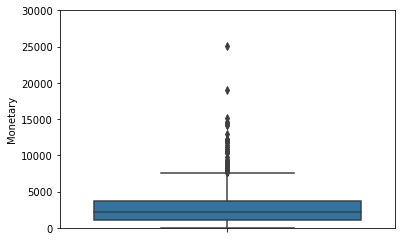

In [430]:
sns.boxplot(y='Monetary',data=RFM)

plt.ylim(0,30000)
plt.show()

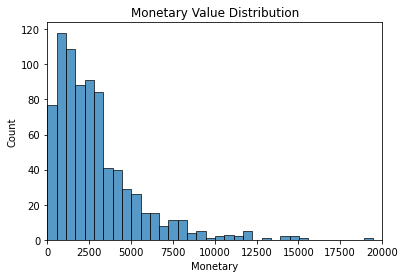

In [431]:
sns.histplot(data=RFM['Monetary'])
plt.title('Monetary Value Distribution')
plt.xlim(0,20000)
plt.show()

In [432]:
kmeans = KMeans(n_clusters=4,random_state=1)

In [433]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):

    #create column names using a prefix
    new_cluster_field_name = 'new_' + cluster_field_name
    #get mean value for the target column name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    #sort mean values in ascending order
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    #create an index
    df_new['index'] = df_new.index
    #merge the new dataframe with old dataframe
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    #remove the old column
    df_final = df_final.drop([cluster_field_name],axis=1)
    #rename the index as the metric score we want
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

# Recenct Cluster

In [434]:
kmeans.fit(RFM[['Recency']])

KMeans(n_clusters=4, random_state=1)

In [435]:
recency_labels = kmeans.predict(RFM[['Recency']])

In [436]:
RFM['Recency_Score'] = recency_labels

In [437]:
RFM = order_cluster('Recency_Score', 'Recency',RFM,True)

In [438]:
RFM.groupby('Recency_Score').Recency.describe()

,count,mean,std,min,25%,50%,75%,max
Recency_Score,,,,,,,,
0,29.0,-806.896552,143.366500,-1164.0,-834.00,-768.0,-718.00,-637.0
1,86.0,-439.779070,75.871470,-614.0,-490.50,-415.0,-386.25,-327.0
2,138.0,-203.978261,50.348344,-320.0,-239.75,-194.5,-160.25,-130.0
3,540.0,-50.801852,35.516120,-126.0,-78.25,-42.0,-22.00,0.0


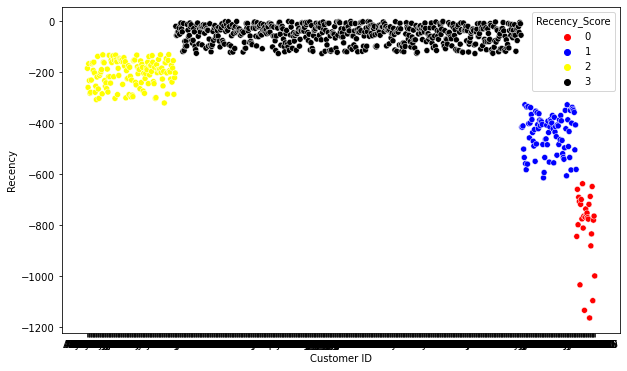

In [439]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=RFM['Customer ID'],
                y='Recency',
                hue='Recency_Score',
                data=RFM,palette=['red','blue','yellow','black'])
                #plt.title=='Frequency Distribution')

plt.show()

# Frequency Cluster

In [440]:
kmeans.fit(RFM[['Frequency']])

#predict clusters
frequency_labels = kmeans.predict(RFM[['Frequency']])

#save clusters in the data frame
RFM['Frequency_Score'] = frequency_labels

#order the clusters
RFM = order_cluster('Frequency_Score', 'Frequency',RFM,True)

#view details of clusters
RFM.groupby('Frequency_Score').Frequency.describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_Score,,,,,,,,
0,270.0,6.388889,2.138483,1.0,5.0,7.0,8.0,9.0
1,308.0,12.344156,1.725002,10.0,11.0,12.0,14.0,15.0
2,170.0,18.870588,2.122231,16.0,17.0,19.0,20.0,23.0
3,45.0,27.733333,3.466725,24.0,25.0,27.0,30.0,37.0


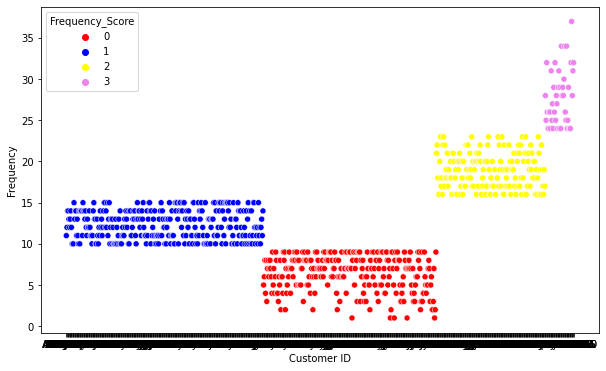

In [441]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=RFM['Customer ID'],
                y='Frequency',
                hue='Frequency_Score',
                data=RFM,palette=['red','blue','yellow','violet'])

plt.show()

# Monetary Value Cluster

In [442]:
#fit model
kmeans.fit(RFM[['Monetary']])
#predict clusters
monetary_labels = kmeans.predict(RFM[['Monetary']])
#save clusters in the data frame
RFM['Monetary_Score'] = monetary_labels
#order clusters
RFM = order_cluster('Monetary_Score', 'Monetary',RFM,True)
#view details of clusters
RFM.groupby('Monetary_Score').Monetary.describe()

,count,mean,std,min,25%,50%,75%,max
Monetary_Score,,,,,,,,
0,368.0,1065.205560,558.862772,4.833,648.11950,1057.4830,1499.5840,2120.954
1,306.0,3188.159782,774.829393,2139.790,2538.42225,3056.9535,3780.5525,4915.602
2,99.0,6624.134184,1270.352056,4930.474,5515.46950,6339.5576,7644.1010,9799.923
3,20.0,13245.483350,3499.615627,10310.880,11093.86700,12010.4115,14249.8145,25043.050


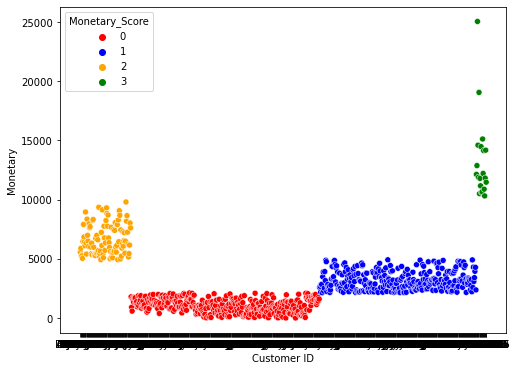

In [443]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=RFM['Customer ID'],
                y='Monetary',
                hue='Monetary_Score',
                data=RFM,
                palette=['red','blue','orange','green'])

plt.show()

# Calculating Overall RFM Score

In [444]:

RFM['Overall_Score'] = RFM[['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis=1)
RFM.head(5)

,Customer ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Overall_Score
0,AA-10315,-184,11,5563.560,2,1,2,5
1,CP-12340,-160,15,5888.275,2,1,2,5
2,DW-13480,-217,11,5271.628,2,1,2,5
3,HR-14830,-159,14,5248.787,2,1,2,5
4,IL-15100,-142,14,5040.736,2,1,2,5


In [445]:
RFM.tail(5)

,Customer ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Overall_Score
788,CL-12565,-284,28,10880.546,2,3,3,8
789,EH-13765,-135,32,10310.880,2,3,3,8
790,GT-14710,-36,29,11820.120,3,3,3,9
791,KL-16645,-47,29,14175.229,3,3,3,9
792,SV-20365,-101,32,11470.950,3,3,3,9


In [446]:
RFM.Overall_Score.value_counts()

5    159
3    154
4    146
6    119
2     69
7     53
1     46
8     24
0     20
9      3
Name: Overall_Score, dtype: int64

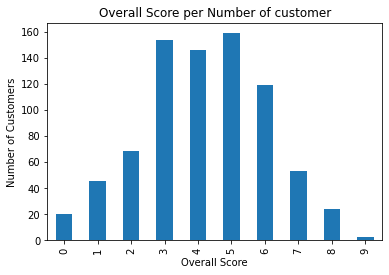

In [447]:
RFM.Overall_Score.value_counts().sort_index().plot.bar()
plt.ylabel('Number of Customers')
plt.xlabel('Overall Score')
plt.title('Overall Score per Number of customer')

plt.show()

In [448]:
RFM.groupby('Overall_Score').Monetary.describe()

,count,mean,std,min,25%,50%,75%,max
Overall_Score,,,,,,,,
0,20.0,815.016300,668.656230,48.360,247.6525,507.2440,1327.0445,2096.3920
1,46.0,868.249272,629.940406,4.833,404.6345,821.1220,1241.5155,2550.8740
2,69.0,1329.109545,920.207274,16.739,675.9420,1094.6780,1821.7420,3984.4524
3,154.0,1164.051188,785.127699,22.328,639.3250,1034.9310,1597.2755,4432.1380
4,146.0,2151.139093,1442.550749,385.430,1207.9270,1850.2980,2693.6180,10501.6530
5,159.0,3483.150497,1923.046220,659.138,2360.8180,3078.6240,4166.3080,19052.2180
6,119.0,4209.145502,1928.343175,2181.479,2849.8365,3625.3290,4900.0360,14142.3340
7,53.0,6687.420113,3862.748146,2224.000,4299.1610,5718.5210,7755.6200,25043.0500
8,24.0,8349.339158,2823.373879,5153.084,6216.2080,7273.3965,10384.2265,15117.3390


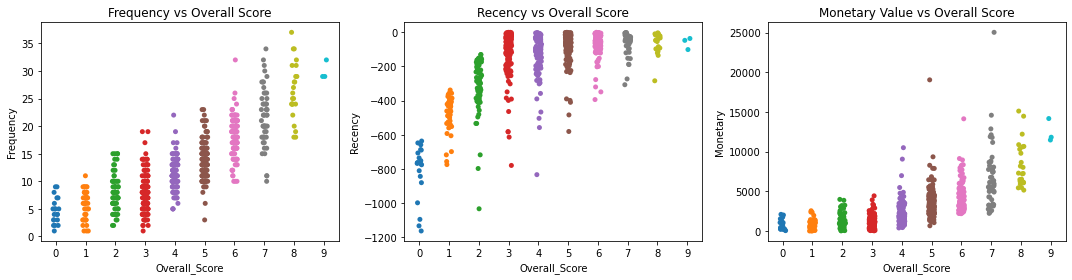

In [449]:
fig, ax = plt.subplots(1,3,figsize=(15,4))

ax[0] = sns.stripplot(y='Frequency',x='Overall_Score',data = RFM, ax=ax[0])
ax[0].set_title('Frequency vs Overall Score')

ax[1] = sns.stripplot(y='Recency',x='Overall_Score',data = RFM, ax=ax[1])
ax[1].set_title('Recency vs Overall Score')

ax[2] = sns.stripplot(y='Monetary',x='Overall_Score',data = RFM, ax=ax[2])
ax[2].set_title('Monetary Value vs Overall Score')

plt.tight_layout()
plt.show()

# Assigning Segments

In [450]:
RFM['Segment'] = 'Low Value'
RFM.loc[RFM.Overall_Score>3,'Segment'] = 'Mid Value'
RFM.loc[RFM.Overall_Score>7,'Segment'] = 'High Value'

In [451]:
Total=RFM.Segment.value_counts().sum()
Total

793

In [452]:
Values=RFM.Segment.value_counts()
Values

Mid Value     477
Low Value     289
High Value     27
Name: Segment, dtype: int64

In [453]:
percentage=((Values/Total)*100).astype(int)
percentage

Mid Value     60
Low Value     36
High Value     3
Name: Segment, dtype: int32

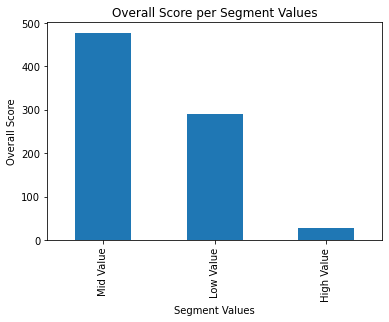

In [455]:
RFM.Segment.value_counts().plot.bar()
plt.ylabel('Overall Score')
plt.xlabel('Segment Values')
plt.title('Overall Score per Segment Values')

plt.show()

In [ ]:
RFM.to_csv('RFM_Project.csv')